In [1]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import os
import numpy as np
import powerlaw
import math
from sklearn import linear_model
from scipy.stats import norm
np.set_printoptions(suppress=True)


## read dataset function

In [226]:
def load_flle(filename):
    x = []
    with open(filename) as f:
        line = f.readline()
        line = line.strip('\n')
    return line

def dirlist(path, files): #找到指定資料夾下所有資料
    filelist = os.listdir(path)

    for filename in filelist:
        filepath = os.path.join(path, filename)
        if os.path.isdir(filepath):
            dirlist(filepath, files)
        else:
            files.append(filepath)
    return files

def load_train_files(path):
    x = []
    y = []
    list = os.listdir(path)
    for i in range(0, len(list)):
        path2 = os.path.join(path, list[i])
        if os.path.isfile(path2):
            x.append(load_flle(path2))
            y.append(0)
    return x, y


def load_attack_files(path, x, y, attack_type):
    total = 0
    for i in range(1,11):
        files = dirlist(path + attack_type +"_" + str(i), [])
        total = total + len(files)
        for file in files:
            x.append(load_flle(file))
            y.append(1)
    print(attack_type + " data: " + str(total))
    return x, y

def get_increasing_array(length): #拿到x軸的數列 : [1,2,3,.....,N]
    arr = np.zeros(length)
    for i in range(length):
        arr[i] = i
    return arr

def find_one(arr): #找到陣列第一個出現1的index
    for i in range(len(arr)):
        if arr[i] == 1:
            break
    return i

def indent(arr): #壓縮連續重複呼叫的system call number成一個
    last = -1
    rt_arr = np.zeros(1)
    for i in range(len(arr)):
        if arr[i] != last:
            rt_arr = np.append(rt_arr, arr[i])
            last = arr[i]
            
    return rt_arr[1:]

def log_and_fit(X,Y):
    X = np.log10(X)  
    Y = np.log10(Y) 
    X2 = []
    Y2 = []
    for xi ,yi in zip(X,Y):
        X2.append([float(xi)])
        Y2.append(float(yi))

    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(X2, Y2)
    #y' = Gamma * X' + A
    print('Gamma: ', regr.coef_)
    print("A: ",regr.intercept_)
    # The mean square error
    print("error: %.8f" % np.mean((regr.predict(X_parameter) - Y_parameter) ** 2))  # 残差平方和

    plt.title("Log Data")
    plt.scatter(X2, Y2,  color='blue', s=10)
    plt.plot(X2, regr.predict(X2), color='red',linewidth=3)

    # plt.xticks([]) #關閉X軸
    # plt.yticks([]) #關閉y軸
    plt.show()

## read data

In [159]:
attack_type = ['Adduser', 'Hydra_FTP', 'Hydra_SSH', 'Java_Meterpreter', 'Meterpreter', 'Web_Shell']
xa = []
ya = []
for attack in attack_type:
    xa, ya = load_attack_files("ADFA-LD/Attack_Data_Master/", xa, ya, attack)
xt, yt = load_train_files("ADFA-LD/Training_Data_Master/")  
xv, yv = load_train_files("ADFA-LD/Validation_Data_Master/")  
x_trn = xt + xa
y_trn = yt + ya
x_val = xv 
y_val = yv 


Adduser data: 91
Hydra_FTP data: 162
Hydra_SSH data: 176
Java_Meterpreter data: 124
Meterpreter data: 75
Web_Shell data: 118


### Normal n = 1

zip data


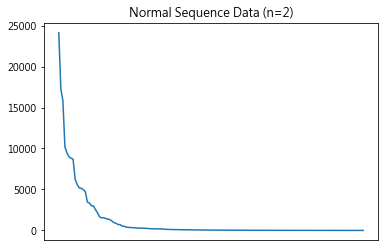

('3', '6', '5', '195', '197')
(24125, 17286, 15846, 10187, 9467)
alpha: 1.3481463239440055
Xmin: 9.0


Calculating best minimal value for power law fit
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substi

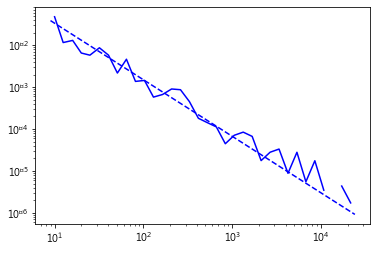

In [236]:
n = 1
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    data = indent(data)
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print("zip data")
plt.title("Normal Sequence Data (n=2)")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px[:5])
print(py[:5])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Gamma:  [-2.63399534]
A:  6.3897573336451625
Residual sum of squares: 0.14855442


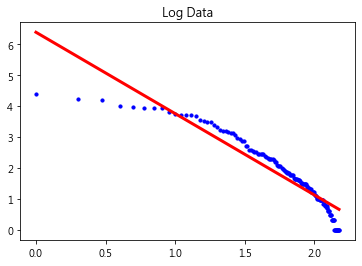

In [237]:
ax = get_increasing_array(len(px)+1)
py = np.array(py)
log_and_fit(ax[1:],py)

### Normal n = 2

zip data


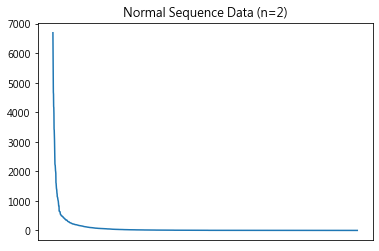

('197 192', '3 6', '195 5', '3 4', '5 197')
(6690, 5928, 5082, 4674, 4612)
alpha: 1.9794226843137341
Xmin: 145.0


Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting wit

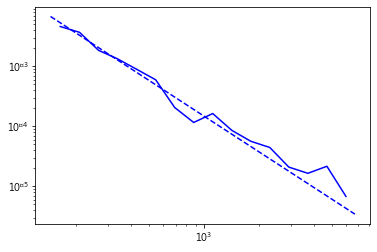

In [238]:
n = 2
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    data = indent(data)
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print("zip data")
plt.title("Normal Sequence Data (n=2)")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px[:5])
print(py[:5])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Gamma:  [-1.89490073]
A:  6.338832467008422
Residual sum of squares: 0.04179227


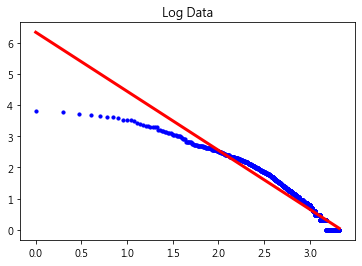

In [239]:
ax = get_increasing_array(len(px)+1)
py = np.array(py)
log_and_fit(ax[1:],py)

### Normal n = 5

zip data


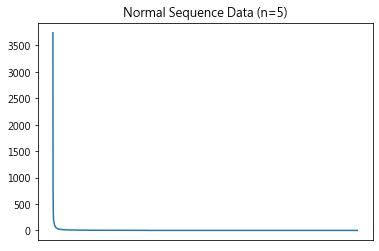

('4 3 4 3 4', '3 4 3 4 3', '33 5 3 197 192', '192 6 33 5 3', '6 33 5 3 197')
(3740, 3721, 2589, 2584, 2578)


Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


alpha: 2.129053489995053
Xmin: 10.0


/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not hav

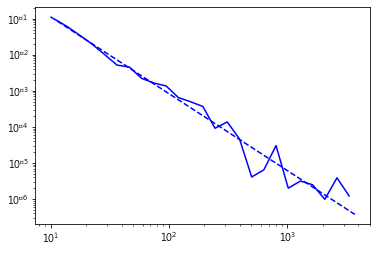

In [230]:
n = 5
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    data = indent(data)
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print("zip data")
plt.title("Normal Sequence Data (n=5)")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px[:5])
print(py[:5])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Gamma:  [-0.85926451]
A:  3.7399316420425595
Residual sum of squares: 0.01170052


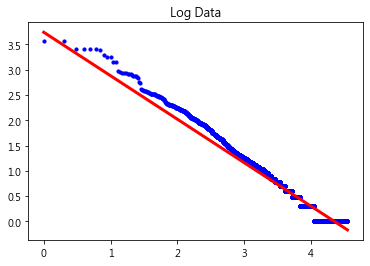

In [231]:
ax = get_increasing_array(len(px)+1)
py = np.array(py)
log_and_fit(ax[1:],py)

### Normal n = 10

zip data


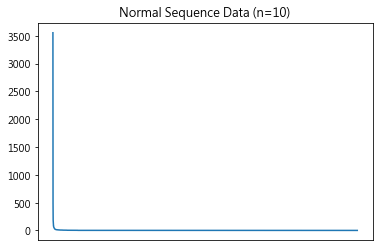

('3 4 3 4 3 4 3 4 3 4', '4 3 4 3 4 3 4 3 4 3', '33 5 3 197 192 6 33 5 3 197', '192 6 33 5 3 197 192 6 33 5', '5 3 197 192 6 33 5 3 197 192')
<class 'numpy.ndarray'>
alpha: 2.125331525843597
Xmin: 41.0


Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy

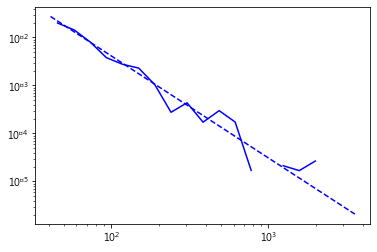

In [232]:
n = 10
dic_normal = defaultdict(lambda: 0)
for d in xt:
    data = d.strip().split(' ')
    data = indent(data)
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_normal[index] = dic_normal[index] + 1

lists = sorted(dic_normal.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples
print("zip data")
plt.title("Normal Sequence Data (n=10)")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px[:5])
print(type(np.array(py[:5])))

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

Gamma:  [-0.51236777]
A:  2.3482491755589083
Residual sum of squares: 0.01640163


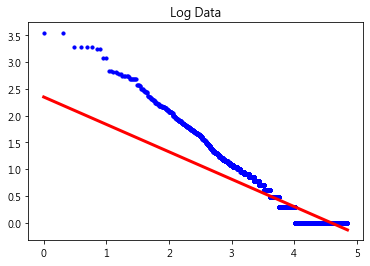

In [233]:
ax = get_increasing_array(len(px)+1)
py = np.array(py)
log_and_fit(ax[1:],py)

### adduser

Adduser data: 91


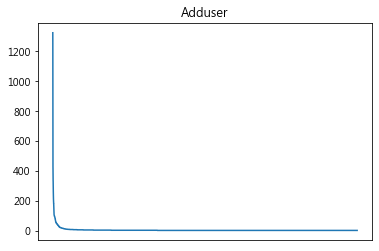

('168 168 168 168 168', '162 162 162 162 162', '54 54 54 54 54', '265 168 168 168 168', '168 168 265 168 168', '168 168 168 168 265', '168 265 168 168 168', '168 168 168 265 168', '114 162 162 162 162', '162 114 162 162 162')
(1320, 1250, 712, 433, 431, 428, 425, 413, 342, 338)


In [182]:
n = 5
dic_addusr = defaultdict(lambda: 0)
x_addusr = []
y_addusr = []
x_addusr, y_addusr = load_attack_files("ADFA-LD/Attack_Data_Master/", x_addusr, y_addusr, 'Adduser')
for d in x_addusr:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_addusr[index] = dic_addusr[index] + 1

lists = sorted(dic_addusr.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) # unpack a list of pairs into two tuples

plt.title("Adduser")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px[:10])
print(py[:10])

### Hydra FTP

Hydra_FTP data: 162


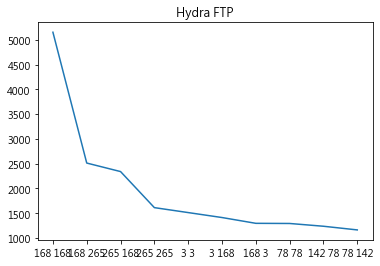

('168 168', '168 265', '265 168', '265 265', '3 3', '3 168', '168 3', '78 78', '142 78', '78 142')
(5153, 2512, 2340, 1612, 1512, 1412, 1295, 1292, 1236, 1162)


In [7]:
dic_ftp = defaultdict(lambda: 0)
x_ftp = []
y_ftp = []
x_ftp, y_ftp = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ftp, y_ftp, 'Hydra_FTP')
for d in x_ftp:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ftp[index] = dic_ftp[index] + 1

lists = sorted(dic_ftp.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra FTP")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Hydra SSH

Hydra_SSH data: 176


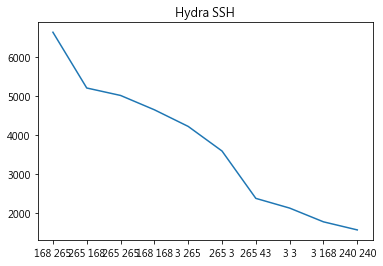

('168 265', '265 168', '265 265', '168 168', '3 265', '265 3', '265 43', '3 3', '3 168', '240 240')
(6628, 5200, 5009, 4642, 4216, 3586, 2373, 2124, 1772, 1565)


In [8]:
dic_ssh = defaultdict(lambda: 0)
x_ssh = []
y_ssh = []
x_ssh, y_ssh = load_attack_files("ADFA-LD/Attack_Data_Master/", x_ssh, y_ssh, 'Hydra_SSH')
for d in x_ssh:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_ssh[index] = dic_ssh[index] + 1

lists = sorted(dic_ssh.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Hydra SSH")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Java Meterpreter

Java_Meterpreter data: 124


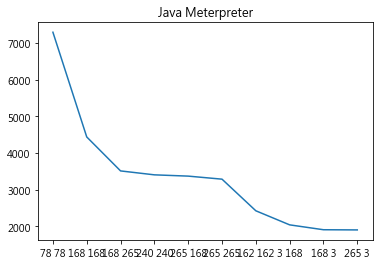

('78 78', '168 168', '168 265', '240 240', '265 168', '265 265', '162 162', '3 168', '168 3', '265 3')
(7296, 4439, 3512, 3405, 3370, 3287, 2424, 2040, 1907, 1902)


In [9]:
dic_java = defaultdict(lambda: 0)
x_java = []
y_java = []
x_java, y_java = load_attack_files("ADFA-LD/Attack_Data_Master/", x_java, y_java, 'Java_Meterpreter')
for d in x_java:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i + n])
        dic_java[index] = dic_java[index] + 1

lists = sorted(dic_java.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Java Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)

### Meterpreter

Meterpreter data: 75


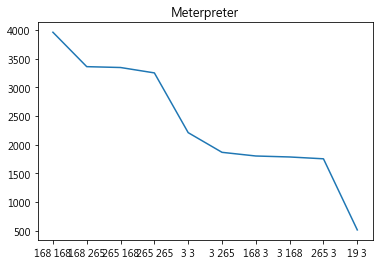

('168 168', '168 265', '265 168', '265 265', '3 3', '3 265', '168 3', '3 168', '265 3', '19 3')
(3960, 3360, 3345, 3251, 2209, 1866, 1802, 1785, 1753, 513)


In [10]:
dic_met = defaultdict(lambda: 0)
x_met = []
y_met = []
x_met, y_met = load_attack_files("ADFA-LD/Attack_Data_Master/", x_met, y_met, 'Meterpreter')
for d in x_met:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_met[index] = dic_met[index] + 1

lists = sorted(dic_met.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Meterpreter")
plt.plot(px, py)
plt.show()
print(px)
print(py)


### Web Shell

Web_Shell data: 118


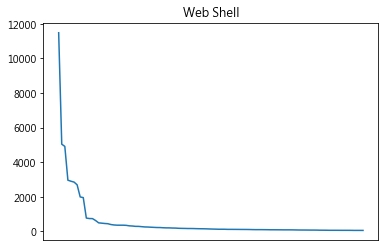

('168 168', '168 265', '265 168', '3 168', '265 265', '168 3', '3 3', '3 265', '265 3', '142 142', '102 168', '168 102', '301 301', '142 3', '5 5', '3 142', '195 195', '43 168', '265 43', '3 19', '168 43', '19 3', '168 146', '146 168', '5 3', '19 19', '265 142', '3 5', '43 3', '142 265', '43 265', '54 54', '104 3', '146 3', '78 78', '4 4', '3 104', '91 5', '265 146', '78 168', '146 265', '3 43', '102 102', '5 91', '168 78', '13 13', '3 146', '5 6', '174 174', '6 5', '3 175', '142 104', '13 4', '104 142', '4 13', '33 33', '7 142', '3 78', '142 7', '43 43', '265 104', '104 265', '3 6', '240 240', '175 142', '240 4', '309 54', '54 309', '142 146', '91 3', '4 240', '3 91', '5 197', '78 3', '4 78', '6 3', '91 91', '175 3', '78 4', '142 175', '146 142', '3 197', '6 91', '197 192', '192 192', '5 195', '4 168', '192 6', '196 196', '340 168', '168 4', '13 240', '78 13', '195 5', '265 102', '195 196', '91 6', '102 265', '7 7', '240 13')
(11483, 5038, 4909, 2955, 2895, 2846, 2689, 1986, 1948, 764

In [27]:
dic_web = defaultdict(lambda: 0)
x_web = []
y_web = []
x_web, y_web = load_attack_files("ADFA-LD/Attack_Data_Master/", x_web, y_web, 'Web_Shell')
for d in x_web:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_web[index] = dic_web[index] + 1

lists = sorted(dic_web.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists[left:right]) # unpack a list of pairs into two tuples

plt.title("Web Shell")
plt.plot(px, py)
plt.xticks([]) #關閉X軸
plt.show()
print(px)
print(py)

### 攻擊序列中 n-gram之累積數分布與power law

### n = 1 的情況 

攻擊序列中出現的system call種類 :  90


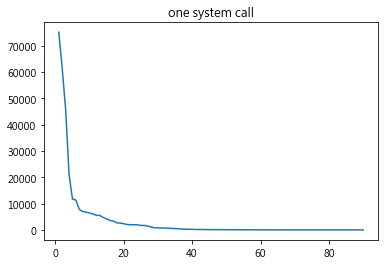

(75175, 61396, 45819, 21125, 11782, 11316, 7781, 6992, 6751, 6446, 6071, 5552, 5506, 4725, 4191, 3579, 3322, 2695, 2582, 2369, 2046, 1974, 1971, 1952, 1697, 1694, 1452, 1133, 795, 756, 750, 724, 630, 574, 519, 430, 347, 294, 254, 225, 162, 161, 157, 125, 112, 112, 103, 103, 88, 71, 68, 68, 67, 63, 62, 58, 55, 49, 47, 33, 27, 26, 18, 18, 18, 16, 16, 13, 13, 10, 7, 6, 6, 5, 5, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1)
alpha: 2.021106382776984
Xmin: 4191.0


Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy 

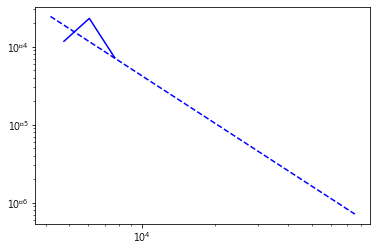

In [12]:
n = 1
dic_xa = defaultdict(lambda: 0)

#對 n-gram的組合做統計並存到字典
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) 
print('攻擊序列中出現的system call種類 : ',len(lists))

#生成一個[1,2,3,4,5,......,n]的陣列做x軸
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)
print(py)

#for i in range(len(a_axis)):
#    a_axis[1:]
#for 
#PLNumlog[i] = math.log10(PLNum[i])
#Numlog[i] = math.log10(Num[i])

results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

### n >= 2 的情況 

攻擊序列中出現的system call種類 :  1413


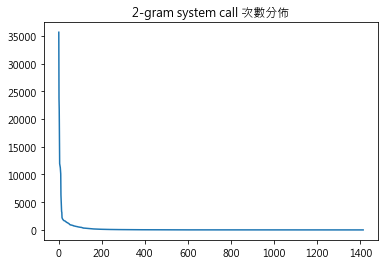

Calculating best minimal value for power law fit


alpha: 1.5584624335269894
Xmin: 21.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

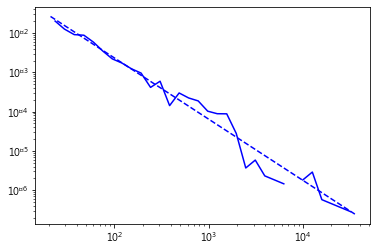

In [13]:
n = 2
dic_xa = defaultdict(lambda: 0)
for d in xa:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xa[index] = dic_xa[index] + 1

lists = sorted(dic_xa.items(), key=lambda kv: kv[1], reverse=True)
px, py = zip(*lists) 
print('攻擊序列中出現的system call種類 : ',len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("2-gram system call 次數分佈")
plt.plot(x_axis[1:], py)
plt.show()
#print(px)


results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

### n = 2 xt + xv 的情況

3596


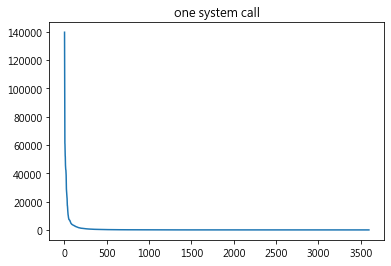

Calculating best minimal value for power law fit


alpha: 1.5652423623900238
Xmin: 90.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

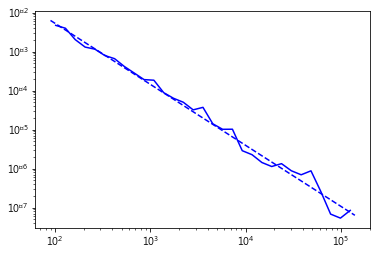

In [14]:
n = 2
dic_xn = defaultdict(lambda: 0) #normal data的字典
for d in xt:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xn[index] = dic_xn[index] + 1

for d in xv:
    data = d.strip().split(' ')
    for i in range(len(data) - n + 1):
        index = ' '.join(data[i:i+n])
        dic_xn[index] = dic_xn[index] + 1
        
lists = sorted(dic_xn.items(), key=lambda kv: kv[1], reverse=True) 
px, py = zip(*lists)
print(len(lists))
x_axis = get_increasing_array(len(lists)+1)
plt.title("one system call")
plt.plot(x_axis[1:], py)
plt.show()


results = powerlaw.Fit(py)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

## 特定system call 組合在train data中的單序列呼叫次數分佈

In [16]:
# attack data
target = [168] #特定system call 組合
cmd_len = len(target)
cmd_index = ' '.join([str(v) for v in target])
commend_count = []
for d in xa:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)




In [17]:
# val data
target = [168] #特定system call 組合
cmd_len = len(target)
cmd_index = ' '.join([str(v) for v in target])
commend_count = []
for d in xv:
    count = 0
    data = d.strip().split(' ')
    for i in range(len(d)):
        #print(' '.join(data[i:i+n]))
        if cmd_index == ' '.join(data[i:i+cmd_len]):
            count = count + 1
    commend_count.append(count)

1600


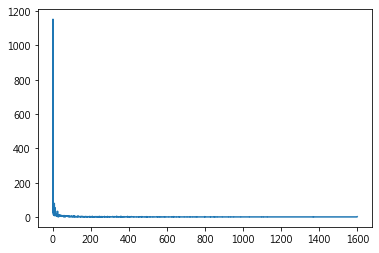

In [18]:
# 畫出分佈圖
sta = np.zeros(max(commend_count)+1)
print(len(sta))

x_axis = get_increasing_array(max(commend_count)+1)

for i in commend_count:
    sta[i] = sta[i] + 1

#print(len(x_axis))
#plt.plot(x_axis[1:-2500], sta[1:-2500])
plt.plot(x_axis[1:], sta[1:])
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:1605: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


alpha: 2.314054892272239
Xmin: 4.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

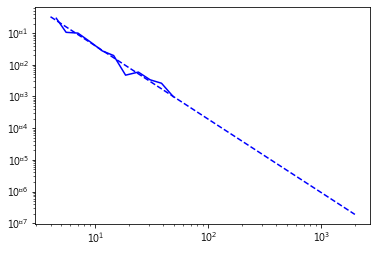

In [19]:
results = powerlaw.Fit(sta)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
R, p = results.distribution_compare('power_law', 'lognormal')

In [20]:
Machine_dependent = [101,110,123,2,11,120,190,243,244,26,67,72,119,173,179,186,42,59,82,90,109,117,192,113,166]
#print(len(Machine_dependent))
Filesystem = [245,246,247,248,249,36,118,134,148,183,253,254,255,256,86,41,55,63,221,135,54,143,9,10,14,38,39,40,\
              83,21,22,52,217,169,5,6,8,12,15,30,33,61,92,93,94,99,100,111,133,193,194,198,207,212,268,269,131,89,\
              141,220,3,4,19,140,145,146,180,181,187,239,142,168,18,28,84,85,106,107,108,195,196,197,62,226,227,228,\
              229,230,231,232,233,234,235,236,237]
#print(len(Filesystem))
Linux_Kernel = [51,184,185,136,1,7,114,252,258,240,104,105,128,129,162,259,260,261,262,263,264,265,266,267,103]
#print(len(Linux_Kernel))
Scheduling = [34,154,155,156,157,158,159,160,161,241,242]
#print(len(Scheduling))
Signals = [0,29,37,48,68,69,73,126,174,175,176,177,178,238,270]
#print(len(Signals))
Systems = [43,57,60,65,66,74,75,76,77,88,96,97,121,122,132,147,172,191,203,204,205,206,208,209,210,211,213,214,215,\
           216,149]
#print(len(Systems))
Time = [13,25,78,79,124]
#print(len(Time))
Kernel_Process = [20,27,64,116,199,200,201,202,224]
#print(len(Kernel_Process))
UID = [16,23,24,46,47,49,50,70,71,80,81,95,138,139,164,165,170,171,182]
#print(len(UID))
Memory_Management = [250,225,257,219,218,150,151,152,153,45,91,125,163,144]
#print(len(Memory_Management))
Swapfile = [87,115]
#print(len(Swapfile))
Socket = [102]
#print(len(Socket))

print('total: ',len(Machine_dependent) + len(Filesystem) + len(Linux_Kernel) \
      + len(Scheduling) + len(Signals) + len(Systems) + len(Time) + len(Kernel_Process) \
      + len(UID) + len(Memory_Management) + len(Swapfile) + len(Socket))

system_dic = {}
system_dic['Machine_dependent'] = 0
system_dic['Filesystem'] = 1
system_dic['Linux_Kernel'] = 2
system_dic['Scheduling'] = 3
system_dic['Signals'] = 4
system_dic['Systems'] = 5
system_dic['Time'] = 6
system_dic['Kernel_Process'] = 7
system_dic['UID'] = 8
system_dic['Memory_Management'] = 9
system_dic['Swapfile'] = 10
system_dic['Socket'] = 11

print('Machine_dependent: ', 0)
print('Filesystem: ', 1)
print('Linux_Kernel: ', 2)
print('Scheduling: ', 3)
print('Signals: ', 4)
print('Systems: ', 5)
print('Time: ', 6)
print('Kernel_Process: ', 7)
print('UID: ', 8)
print('Memory_Management: ', 9)
print('Swapfile: ', 10)
print('Socket: ', 11)


total:  252
Machine_dependent:  0
Filesystem:  1
Linux_Kernel:  2
Scheduling:  3
Signals:  4
Systems:  5
Time:  6
Kernel_Process:  7
UID:  8
Memory_Management:  9
Swapfile:  10
Socket:  11


In [21]:
def systemcall_classify(query):
    class_outcome = np.zeros((1,12))
    query = query.strip().split(' ')
    for i in query:
        if int(i) in Machine_dependent:
            class_outcome[0][0] += 1
        elif int(i) in Filesystem:
            class_outcome[0][1] += 1
        elif int(i) in Linux_Kernel:
            class_outcome[0][2] += 1
        elif int(i) in Scheduling:
            class_outcome[0][3] += 1
        elif int(i) in Signals:
            class_outcome[0][4] += 1
        elif int(i) in Systems:
            class_outcome[0][5] += 1
        elif int(i) in Time:
            class_outcome[0][6] += 1
        elif int(i) in Kernel_Process:
            class_outcome[0][7] += 1
        elif int(i) in UID:
            class_outcome[0][8] += 1
        elif int(i) in Memory_Management:
            class_outcome[0][9] += 1
        elif int(i) in Swapfile:
            class_outcome[0][10] += 1
        elif int(i) in Socket:
            class_outcome[0][11] += 1
    return class_outcome


In [22]:
xt_call_distribution = np.zeros((1,12))
xa_call_distribution = np.zeros((1,12))

for d in xt:
    xt_call_distribution = np.concatenate((xt_call_distribution, systemcall_classify(d)), axis = 0)

print('train data下各類別system call總呼叫次數')
print(sum(xt_call_distribution[1:]))
print('train data下各類別system call單序列平均呼叫次數')
print(sum(xt_call_distribution[1:]) / len(xt) )    

for d in xv:
    xt_call_distribution = np.concatenate((xt_call_distribution, systemcall_classify(d)), axis = 0)

print('normal data下各類別system call總呼叫次數')
print(sum(xt_call_distribution[1:]))
print('normal data下各類別system call單序列平均呼叫次數')
print(sum(xt_call_distribution[1:]) / (len(xt) + len(xv)) )

for d in xa:
    xa_call_distribution = np.concatenate((xa_call_distribution, systemcall_classify(d)), axis = 0)
    
print('attack data下各類別system call總呼叫次數')
print(sum(xa_call_distribution[1:]))
print('attack data下各類別system call單序列平均呼叫次數')
print(sum(xa_call_distribution[1:]) / len(xa))

train data下各類別system call總呼叫次數
[ 17802. 212261.  25685.    408.  11893.    891.  10902.   1303.      0.
  16681.      0.   8646.]
train data下各類別system call單序列平均呼叫次數
[ 21.37094838 254.81512605  30.83433373   0.48979592  14.27731092
   1.06962785  13.08763505   1.56422569   0.          20.02521008
   0.          10.37935174]
normal data下各類別system call總呼叫次數
[ 177264. 1623308.  216464.   10860.   80682.   13966.   72059.   11657.
       0.  121218.       0.   85812.]
normal data下各類別system call單序列平均呼叫次數
[ 34.05648415 311.87473583  41.58770413   2.08645533  15.50086455
   2.68318924  13.84418828   2.23957733   0.          23.28876081
   0.          16.48645533]
attack data下各類別system call總呼叫次數
[  4392. 172235.  84697.    130.   4650.   6412.  27876.   1102.      0.
   4695.      0.   7781.]
attack data下各類別system call單序列平均呼叫次數
[  5.88739946 230.87801609 113.53485255   0.17426273   6.23324397
   8.59517426  37.36729223   1.4772118    0.           6.29356568
   0.          10.43029491]


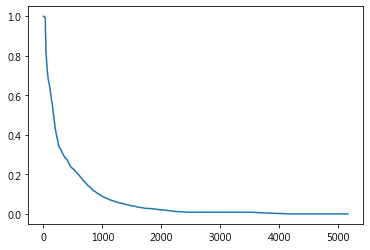

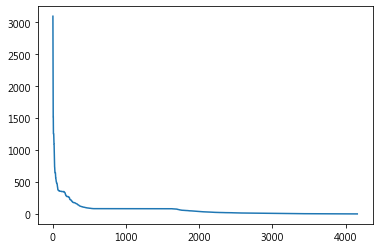

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/Users/user/anaconda3/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


alpha: 2.793460760052482
Xmin: 417.5


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


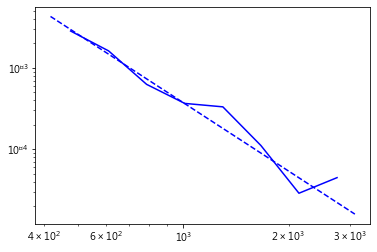

In [243]:
multiple = 1
ratio1 = []
ratio2 = []

for query in xt_call_distribution[1:]:
    #if query[2] != 0 :
    
    #method 1
    if((query[2])/sum(query) != 1):
        pr = ((query[2])/sum(query)) * multiple
        ratio1.append(pr)
    
    #method 2
    if query[2]!=0 :
        ratio2.append(query[1] / query[2])
    
ratio1 = np.sort(ratio1)[::-1]
ratio2 = np.sort(ratio2)[::-1]

#print(len(ratio))
#print(ratio[:10])

x_axis = get_increasing_array(len(ratio1)+1)
plt.plot(x_axis[1:], ratio1)
plt.show()

x_axis = get_increasing_array(len(ratio2)+1)
plt.plot(x_axis[1:], ratio2)
plt.show()

results = powerlaw.Fit(ratio2)
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)
#R, p = results.distribution_compare('power_law', 'lognormal')
#print(np.sort(ratio12,reverse))

In [94]:
print(ratio1[1])
print(sum(ratio1[:]))
print(sum(ratio1[:]) / len(ratio1))
print(len(ratio1))
test1 = np.zeros(1001)
test0 = np.zeros(1001)
for i in range(len(ratio1)):
    if ratio1[i] * 1000 > 1 : 
        test0[int(np.around(ratio1[i] * 1000))] += 1
        test1[int(np.around(abs(ratio1[i] * 1000 - 9)))] += 1
print(sum(ratio2[:]))
print(sum(ratio2[:]) / len(ratio2))

0.9992937853107344
367.7755895034521
0.07124672404173811
5162
280322.34478820686
67.40138129074461


[   0.   23.  106.   92.   66.   77.   47.   87.   69. 1123.]
[ 23. 106.  92.  66.]


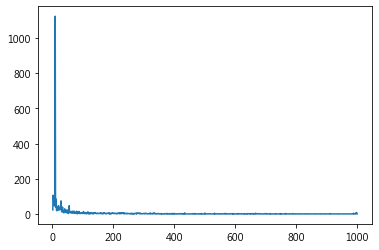

In [100]:
x_axis = get_increasing_array(len(test0))
print(test0[:10])
print(test0[1:5])
plt.plot(x_axis[1:], test0[1:])
plt.show()

[1123.  108.  138.  130.   99.   84.  113.  148.   55.   25.]
[108. 138. 130.  99.]


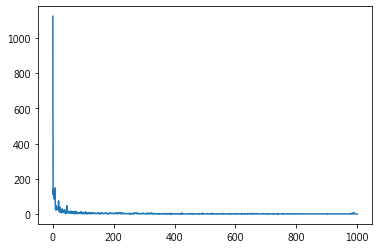

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


alpha: 2.263875571293684
Xmin: 4.0


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

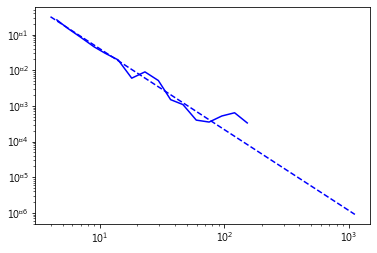

In [98]:
x_axis = get_increasing_array(len(test1))
print(test1[:10])
print(test1[1:5])
plt.plot(x_axis[:], test1[:])
plt.show()
results = powerlaw.Fit(test1[:])
results.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
results.plot_pdf( color= 'b')
print("alpha:", results.power_law.alpha)
print("Xmin:", results.power_law.xmin)

In [261]:
test1
ax = get_increasing_array(len(test1))
test1[1:]+1

array([109., 139., 131., 100.,  85., 114., 149.,  56.,  26.,  23.,  48.,
        31.,  24.,  33.,  26.,  27.,  34.,  26.,  75.,  28.,  18.,  12.,
        27.,  40.,  21.,  12.,   9.,   7.,  10.,  20.,  30.,  24.,  13.,
         9.,  11.,  21.,  16.,   7.,  24.,  13.,  12.,  12.,   3.,  17.,
        12.,  48.,   8.,  10.,  11.,   9.,   7.,  14.,  15.,   8.,  12.,
         5.,  12.,  17.,  14.,  10.,   5.,  16.,   8.,   9.,   5.,  11.,
         9.,   6.,   6.,  16.,  13.,   1.,   9.,   7.,  13.,   4.,  10.,
        15.,   7.,   3.,   5.,   3.,   3.,   5.,   6.,   9.,   6.,   8.,
         9.,   8.,   3.,   4.,  14.,   5.,   4.,   7.,   5.,   2.,   8.,
         5.,   7.,   3.,   4.,   2.,   8.,   6.,  13.,  10.,   2.,   8.,
         2.,   4.,   2.,   5.,   3.,   6.,   3.,   4.,   7.,   3.,   6.,
         4.,   4.,   1.,   3.,   8.,   3.,   6.,   4.,   7.,   9.,   5.,
         4.,   5.,   4.,   2.,   3.,   5.,   6.,   4.,   3.,   3.,   4.,
         4.,   5.,   5.,   4.,   2.,   7.,   4.,   

Gamma:  [-0.7892116]
A:  -0.04581663850947354
Residual sum of squares: 0.03956737


/Users/user/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/user/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


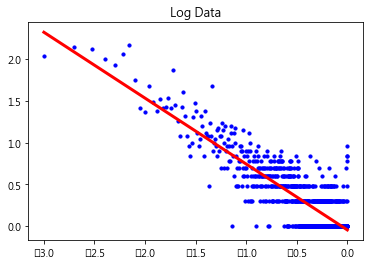

In [262]:
ax = get_increasing_array(len(test1))
log_and_fit(ax[1:]/1000,test1[1:]+1)

In [220]:
te = np.array([1,2,-1])
print(np.where(te==-1, 1, te) )

[1 2 1]


In [222]:
def DataGenerate():
    X = np.arange(10, 1010, 10)  # 0-1，每隔着0.02一个数据  0处取对数,会时负无穷  生成100个数据点
    noise=norm.rvs(0, size=100, scale=0.2)  # 生成50个正态分布  scale=0.1控制噪声强度
    Y=[]
    for i in range(len(X)):
        Y.append(20.8*pow(X[i],-0.3)+noise[i])  # 得到Y=10.8*x^-0.3+noise

    # plot raw data
    Y=np.array(Y)
    plt.title("Raw data")
    plt.scatter(X, Y,  color='black')
    plt.show()
    print(type(X))
    return X,Y



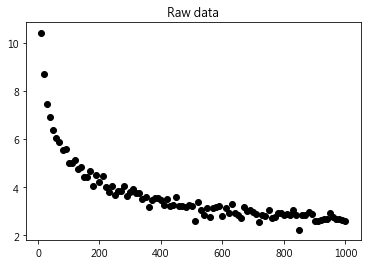

<class 'numpy.ndarray'>
[  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480  490  500  510  520  530  540  550  560
  570  580  590  600  610  620  630  640  650  660  670  680  690  700
  710  720  730  740  750  760  770  780  790  800  810  820  830  840
  850  860  870  880  890  900  910  920  930  940  950  960  970  980
  990 1000] [10.43483175  8.71681712  7.47404602  6.9303871   6.36600859  6.04802225
  5.87984384  5.52842967  5.58338232  5.01770889  5.02634049  5.11213265
  4.75435582  4.8394574   4.43654916  4.44285111  4.67151884  4.06773757
  4.49798778  4.2150117   4.47456535  4.0067893   3.80955002  4.05283498
  3.68928687  3.85337096  3.8451483   4.03943031  3.64586743  3.80234093
  3.90759858  3.77501177  3.7444871   3.50627959  3.60738441  3.17408582
  3.4644119   3.53275314  3.5

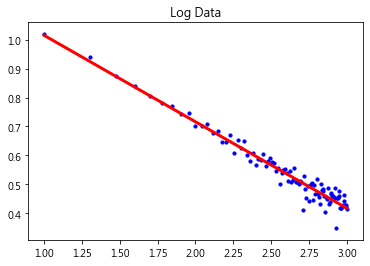

In [223]:
X,Y=DataGenerate()
print(X,Y)
log_and_fit(X,Y)